# LENDING CLUB CASE STUDY

## Data Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the    analysis stage. These aforementioned problems are handled as follows:

       - For Missing Values: Some common techniques to treat this issue are
            - Dropping the rows containing the missing values
            - Imputing the missing values
            - Keep the missing values if they don't affect the analysis
       - Incorrect Data Types:
            - Clean certain values
            - Clean and convert an entire column

In [1]:
#Reading the loan csv file
#importing the libraries

import numpy as np
import pandas as pd
loan = pd.read_csv("E:\Ashima\PGDML\Lending Club Case Study\loan\loan.csv", engine = 'python')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
#Checking the number of rows and columns of the dataframe loan
loan.shape

(39717, 111)

In [3]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
#Drop the columns with all null/NAN values
loan.dropna(axis=1, how='all', inplace = True)

In [5]:
#Checking rows and columns again
loan.shape

(39717, 57)

In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
#drop columns with more than 90% of null values
loan.drop(['mths_since_last_record', 'next_pymnt_d'], axis = 1, inplace = True)

In [8]:
loan.shape

(39717, 55)

In [9]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
#drop customer behaviour variables
loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1 , inplace = True)

In [11]:
loan.shape

(39717, 34)

In [12]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
#crrent case study analysis does not give any inference from emp_title, title, desc, zipcode, address, funded_amnt, funded_amnt_inv, url, purpose, addr_state
loan.drop(['emp_title', 'title', 'desc', 'zip_code', 'funded_amnt', 'funded_amnt_inv', 'url', 'purpose','addr_state'], axis = 1, inplace=True)

In [14]:
loan.shape

(39717, 25)

In [15]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'dti',
       'mths_since_last_delinq', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [16]:
#drop the columns which are not affecting our analysis towards finding out the desirable reasons of default borrowers.
loan.drop(['id', 'member_id','verification_status', 'issue_d', 'pymnt_plan','mths_since_last_delinq', 'initial_list_status','collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies','tax_liens'], axis = 1, inplace = True)

In [17]:
loan.shape

(39717, 11)

In [18]:
#drop the rows having loan status as current, this status cannot decide whether borrower is good(fully paid) or bad(charged off) as he is still paying the installments.
loan = loan[~(loan.loan_status=="Current")]

In [19]:
#Finally after data cleaning the number of rows and columns
loan.shape

(38577, 11)

### Handling missing values in final variables required

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       38577 non-null  int64  
 1   term            38577 non-null  object 
 2   int_rate        38577 non-null  object 
 3   installment     38577 non-null  float64
 4   grade           38577 non-null  object 
 5   sub_grade       38577 non-null  object 
 6   emp_length      37544 non-null  object 
 7   home_ownership  38577 non-null  object 
 8   annual_inc      38577 non-null  float64
 9   loan_status     38577 non-null  object 
 10  dti             38577 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [21]:
#droppping the null values from emp_length

loan = loan[~loan.emp_length.isnull()]
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [22]:
#emp_length has no more null values
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       37544 non-null  int64  
 1   term            37544 non-null  object 
 2   int_rate        37544 non-null  object 
 3   installment     37544 non-null  float64
 4   grade           37544 non-null  object 
 5   sub_grade       37544 non-null  object 
 6   emp_length      37544 non-null  object 
 7   home_ownership  37544 non-null  object 
 8   annual_inc      37544 non-null  float64
 9   loan_status     37544 non-null  object 
 10  dti             37544 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


### Handling datatypes

In [23]:
#int_rate column should be in float datatype so '%' is removed and converted to float 
loan.int_rate = loan.int_rate.apply(lambda x: float(x[0:-1]))

In [24]:
#verify the values of int_rate column again
loan.int_rate.value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
16.71      1
21.48      1
18.72      1
17.34      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [25]:
#verify the int_rate datatype again
loan.int_rate.dtype

dtype('float64')

In [26]:
#term column has two values 36 and 60 which should be in int datatype so 'months' is removed
loan.term = loan.term.apply(lambda x: x[0:3])

In [27]:
#verify term column again
loan.term.value_counts()

 36    28287
 60     9257
Name: term, dtype: int64

In [28]:
#Change the dtype of this column
loan.term = loan.term.astype('int32')

In [29]:
#cross check the datatype of term column
loan.term.dtype

dtype('int32')

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       37544 non-null  int64  
 1   term            37544 non-null  int32  
 2   int_rate        37544 non-null  float64
 3   installment     37544 non-null  float64
 4   grade           37544 non-null  object 
 5   sub_grade       37544 non-null  object 
 6   emp_length      37544 non-null  object 
 7   home_ownership  37544 non-null  object 
 8   annual_inc      37544 non-null  float64
 9   loan_status     37544 non-null  object 
 10  dti             37544 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 3.3+ MB


In [31]:
#for better analysis of variables, loan status-Charged Off and Fully Paid is replaced by 0 and 1 values respectively.
loan = loan.replace(['Charged Off', 'Fully Paid'], [0, 1])
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti
0,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,1,27.65
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,0,1.00
2,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,1,8.72
3,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,1,20.00
5,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,1,11.20


In [32]:
#changing the datatype of loan_status
loan.loan_status = loan.loan_status.astype('int32')

In [33]:
#verifying the datatype of loan status
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       37544 non-null  int64  
 1   term            37544 non-null  int32  
 2   int_rate        37544 non-null  float64
 3   installment     37544 non-null  float64
 4   grade           37544 non-null  object 
 5   sub_grade       37544 non-null  object 
 6   emp_length      37544 non-null  object 
 7   home_ownership  37544 non-null  object 
 8   annual_inc      37544 non-null  float64
 9   loan_status     37544 non-null  int32  
 10  dti             37544 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(4)
memory usage: 3.2+ MB


#### As per the data dictionary, employment length variable has values ranging from 0 to 10 where 0 means less than 1 year and 10 means 10 or more than 10 years

In [34]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [35]:
#assigning the values 0 to 10 to emp_length variable
loan = loan.replace({"emp_length": emp_length_dict })
loan.emp_length.value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [36]:
#changing the datatype of emp_length
loan.emp_length = loan.emp_length.astype('int32')

In [37]:
#verifying the datatype of emp_length
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       37544 non-null  int64  
 1   term            37544 non-null  int32  
 2   int_rate        37544 non-null  float64
 3   installment     37544 non-null  float64
 4   grade           37544 non-null  object 
 5   sub_grade       37544 non-null  object 
 6   emp_length      37544 non-null  int32  
 7   home_ownership  37544 non-null  object 
 8   annual_inc      37544 non-null  float64
 9   loan_status     37544 non-null  int32  
 10  dti             37544 non-null  float64
dtypes: float64(4), int32(3), int64(1), object(3)
memory usage: 3.0+ MB


## Data Analysis

### Correlation Matrix

<AxesSubplot:>

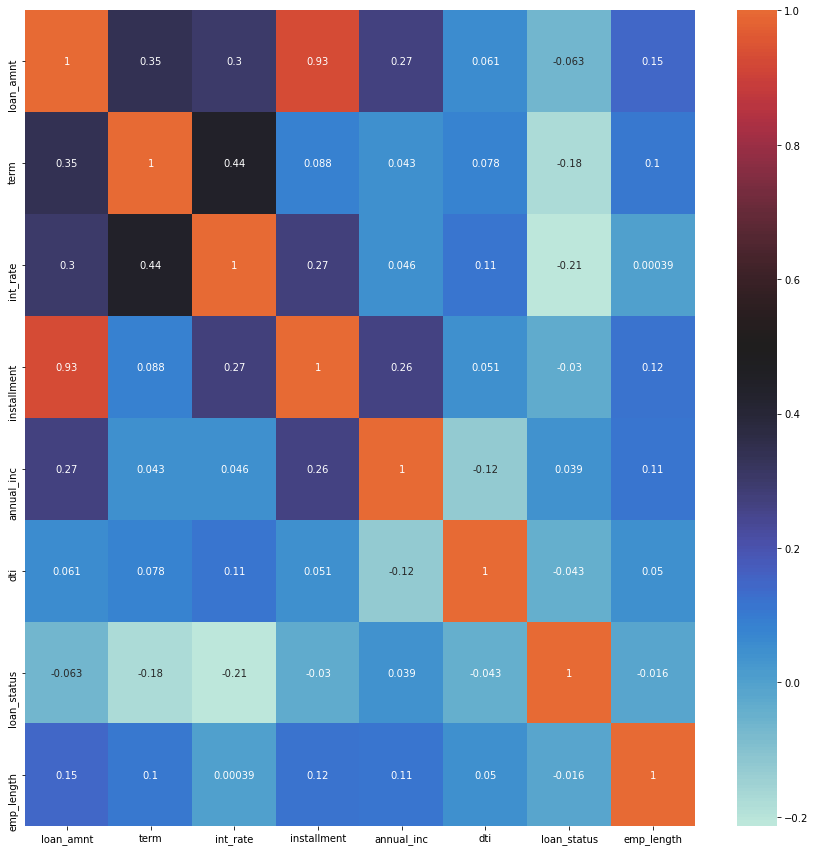

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc','dti', 'loan_status', 'emp_length']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

#### Observation: Potting the correlation of numercical variables on heatmap shows that is low correlation between loan status and other independent variables. Hence, we cannot drop any of the above selected 11 variables.

### Univariate Analysis

#### dti analysis

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.
A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income. In other words, if your DTI ratio is 15%, that means that 15% of your monthly gross income goes to debt payments each month. Conversely, a high DTI ratio can signal that an individual has too much debt for the amount of income earned each month.
Typically, borrowers with low debt-to-income ratios are likely to manage their monthly debt payments effectively. As a result, banks and financial credit providers want to see low DTI ratios before issuing loans to a potential borrower. The preference for low DTI ratios makes sense since lenders want to be sure a borrower isn't overextended meaning they have too many debt payments relative to their income
source: https://www.investopedia.com/terms/d/dti.asp

In [39]:
#rechecking dti values lying between 0 to 30. 168 entries has 0 dti value and higher value dti i.e. more than 20 has less count. 
#This shows maximum cases in our dataset has fully paid borrowers. Mean of dti is 13 approximately.
loan.dti.value_counts()

0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.40      1
29.76      1
28.55      1
28.82      1
27.51      1
Name: dti, Length: 2848, dtype: int64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

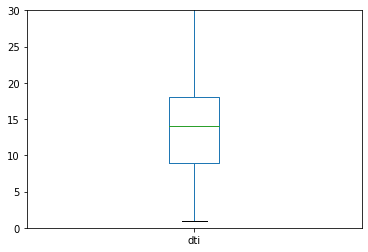

In [41]:
plt.ylim(0, 30)
loan['dti'].value_counts().plot(kind='box');
plt.show()

#### Observation: As per the concept of dti in banking, more is the dti, higher is the charged off hence more risk to the bank. Here dti mean is 13 and few people range in higher dti value so we have large number of fully paid customers.

#### Analysis of annual income

<AxesSubplot:xlabel='annual_inc'>

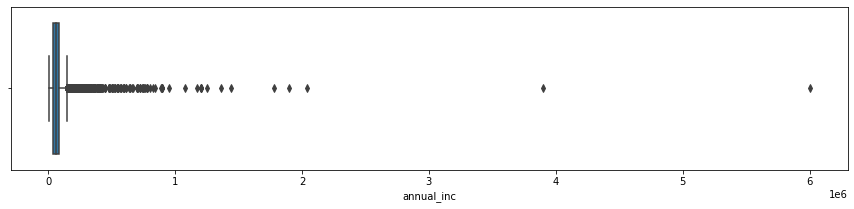

In [42]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['annual_inc'], data=loan)

#### The annual income reported by the borrowers range from min of 4,000 to max of 6,000,000. Median annual income is around 60,000. Most people have an annual income less than 115000.

#### Employment length analysis

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


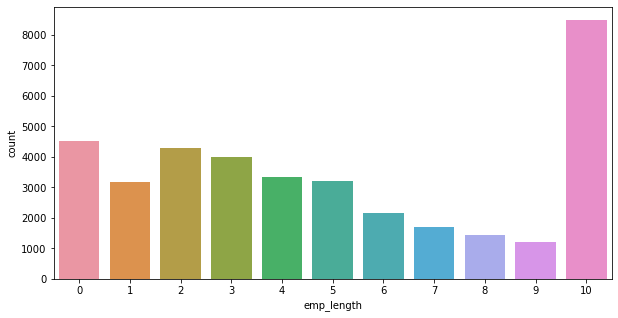

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
plt.show()

#### Observation: More number of borrowers have more than 10 years of work experience

#### Analysis of grade 

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

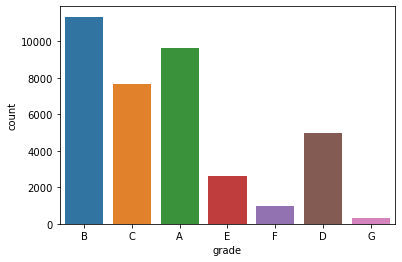

In [44]:
sns.countplot(loan['grade'])

#### Observation: Most loans are high quality , with grades of A or B

#### Home ownership analysis

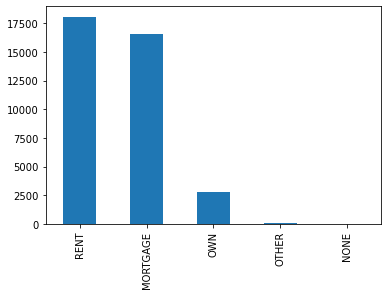

In [45]:
loan['home_ownership'].value_counts().plot(kind='bar');

#### Observation: Borrowers for loan are more on Rent

### Bivariate Analysis

#### dti v/s loan_status

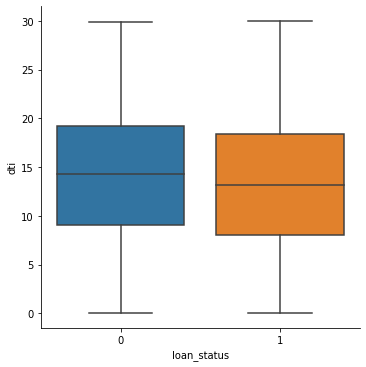

In [46]:
sns.catplot(x='loan_status', y='dti', data=loan, kind='box', estimator=np.mean)
plt.show()

#### Observation: Boxplot between dti and loan status shows that charged off(0) increases with increase in dti. Also, based on dti concept, higher dti of the borrower is a risk to bank.

#### loan_amnt v/s grade

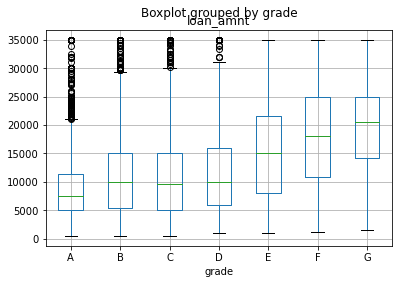

In [47]:
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

#### Observation: Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan

#### annual_inc v/s grade

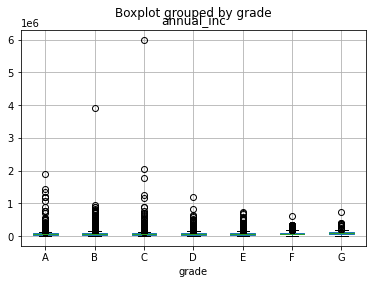

In [48]:
loan.boxplot(column='annual_inc', by='grade')
plt.show()

#### Observation: People with higher annual income has higher grade that means they are good customers and less likely to default.

#### int_rate v/s term

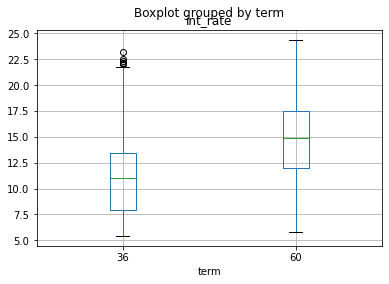

In [49]:
loan.boxplot(column='int_rate', by='term')
plt.show()

#### Observation: Intrest rates are based on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

#### int_rate v/s sub_grade

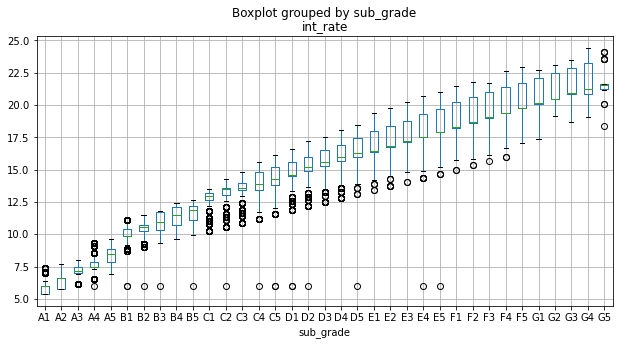

In [50]:
loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

#### Observation: Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan

#### int_rate v/s grade

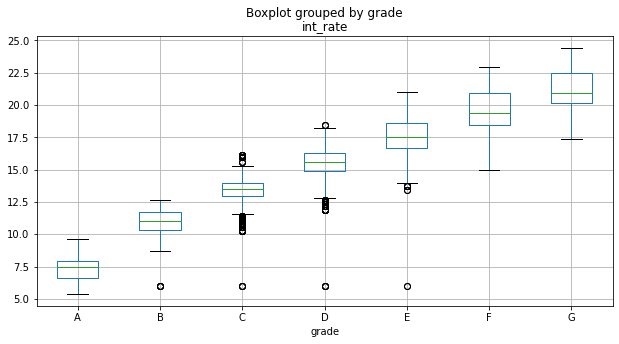

In [51]:
loan.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

#### Observation: Higher the interest rate lower is the grade of borrower which clearly shows as default customer.

#### int_rate effect on loan_status

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

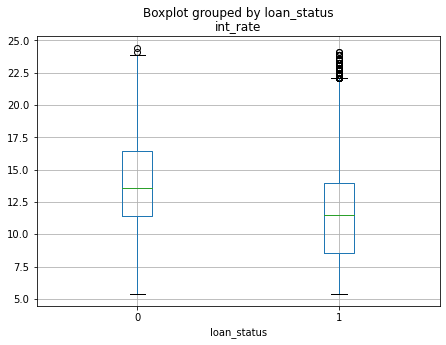

In [52]:
loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

#### Observation: Higher the interest, the possibility of charged off loans increases.

#### loan status v/s annual income

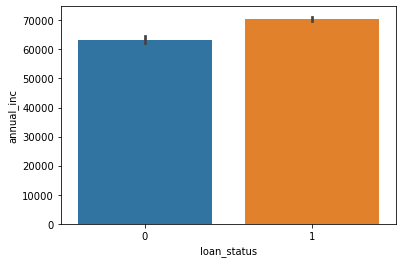

In [53]:
sns.barplot(x='loan_status', y='annual_inc', data=loan, estimator=np.mean)
plt.show()

#### Observation: Higher is the annual income, more are fully paid borrowers.

#### Employment length v/s loan status

<AxesSubplot:xlabel='loan_status', ylabel='emp_length'>

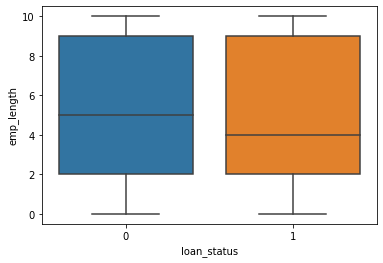

In [54]:
#plt.ylim(0,12)
sns.boxplot(y='emp_length', x='loan_status', data=loan)

### Multivariate Analysis

#### Loan_amnt v/s grade v/s term

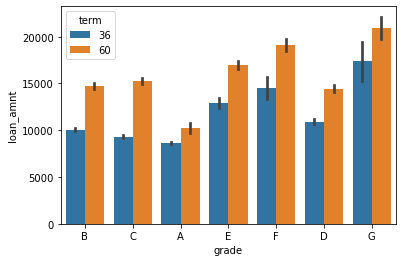

In [55]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
plt.show()

#### Observation: Higher loan amount is associated with lower grade for longer terms

#### loan amount v/s term v/s loan status

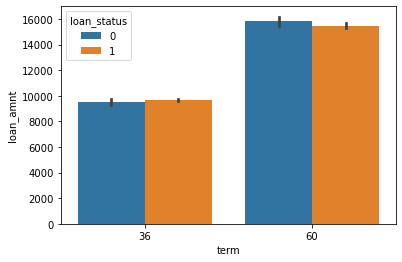

In [56]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

#### Observation: Higher loans are for higher terms and results into more charged offs

#### loan amount v/s employment length v/s loan status

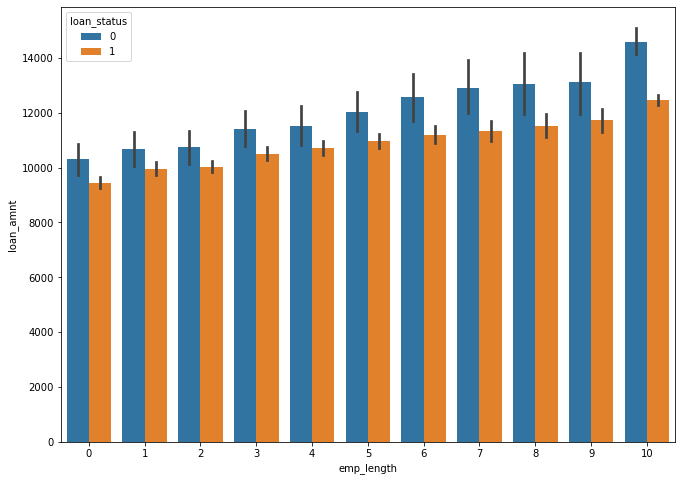

In [57]:
fig, ax = plt.subplots(figsize=(11,8))
sns.barplot(x='emp_length', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean, ax=ax)
plt.show()

#### Observation: This makes the analysis more evident that if employment length is more, the person has taken more amount of loan and tends to be higher in possibility of charged off. 

#### dti v/s emplyment length v/s loan status

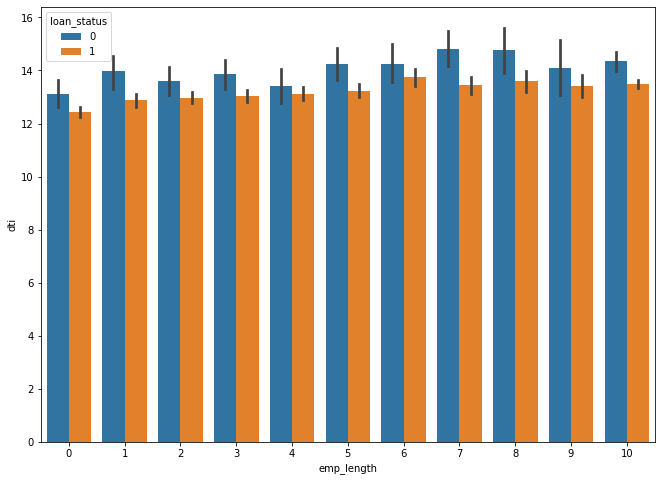

In [58]:
fig, ax = plt.subplots(figsize=(11,8))
sns.barplot(x='emp_length', y='dti', hue="loan_status", data=loan, estimator=np.mean, ax=ax)
plt.show()

#### Observation: Dti analysis here becomes more evident when employment length is also considered in analysis where person between 7-8 years of employment length are mean of this analysis.

In [59]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,1,27.65
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,0,1.00
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,1,8.72
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,1,20.00
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,1,11.20


### Segregating Numerical and Categorical features for final analysis

In [60]:
numerical_variables=loan.select_dtypes(include=['number']).columns
print("Number of Numerical features: ", len(numerical_variables))

categorical_variables=loan.select_dtypes(include=['object']).columns
print("Number of Categorical features: ", len(categorical_variables))

Number of Numerical features:  8
Number of Categorical features:  3


### Bivariate analysis of loan status with Numerical variables

In [61]:
numerical_variables

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti'],
      dtype='object')

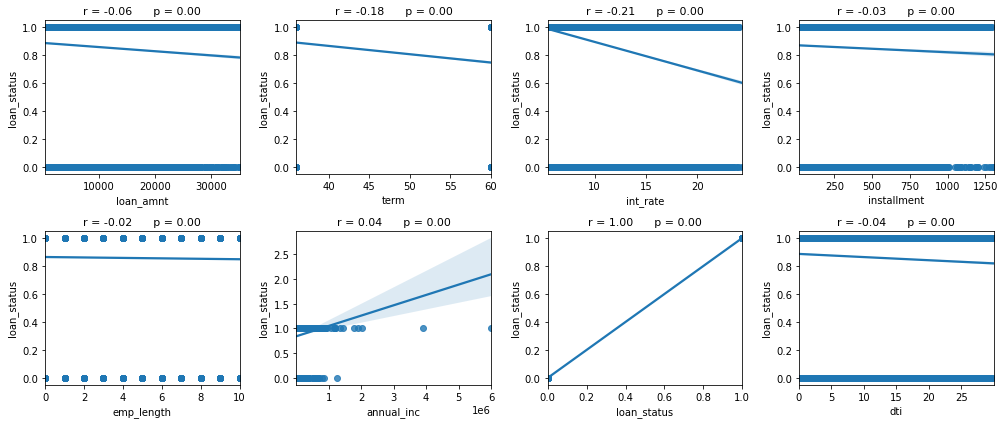

In [62]:
from scipy.stats import norm,skew
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
target="loan_status"
nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_variables)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_variables) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(loan[li_plot_num_feats[i]], loan[target], ax = axs[r][c])
            stp = stats.pearsonr(loan[li_plot_num_feats[i]], loan[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

### Bivariate analysis of loan status with Categorical variables

In [63]:
categorical_variables

Index(['grade', 'sub_grade', 'home_ownership'], dtype='object')

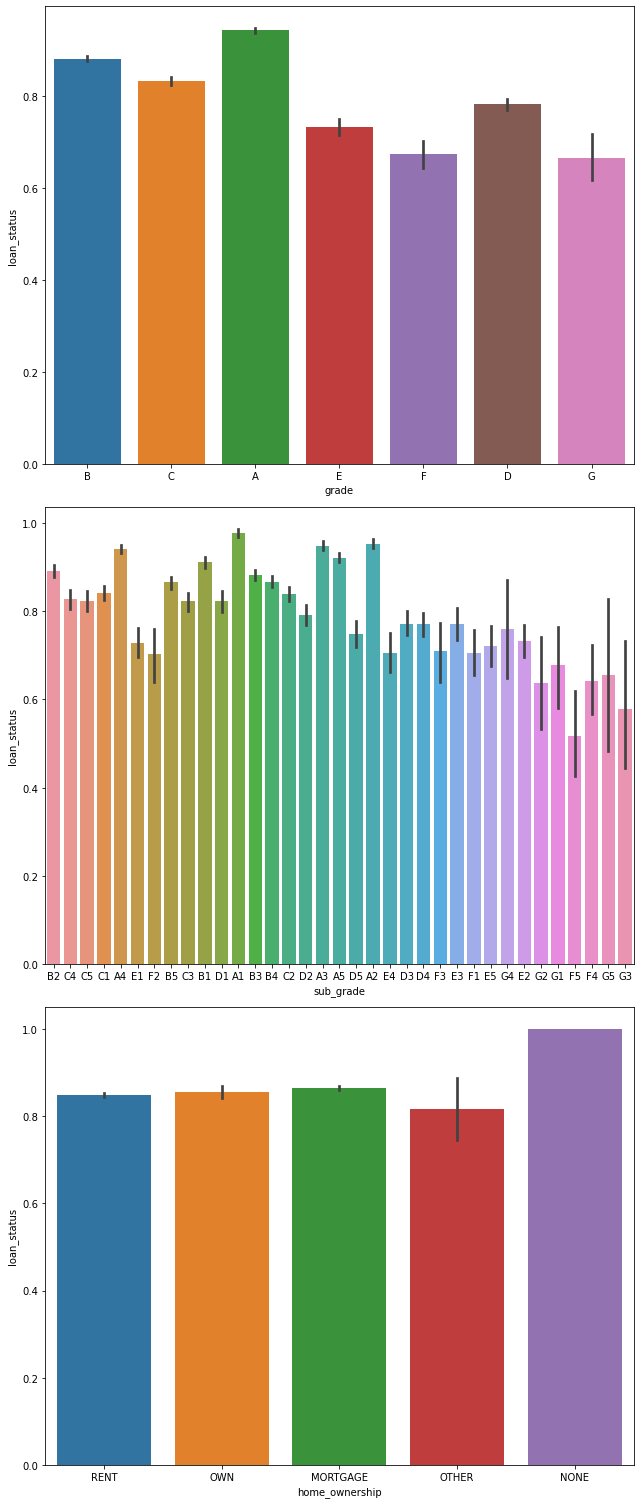

In [64]:
li_cat_feats= list(categorical_variables)
nr_rows = 3
nr_cols = 1

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*9,nr_rows*7))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.barplot(x=li_cat_feats[i], y=target, data=loan, ax = axs[r])
    
plt.tight_layout()    
plt.show()